**IMPORT CSV**

In [2]:
import geopandas as gpd
import pandas as pd

In [3]:
# importing pandas package
import pandas as pd
 
# making data frame from csv file
df_ispa = pd.read_excel('/Users/roniabuhanif/Downloads/BMKG/data_skripsi/data_kesehatan/ispa_total.xls')
df_climate = pd.read_csv('/Users/roniabuhanif/Downloads/BMKG/data_skripsi/uji_metode/climate_all_year_time.csv')

In [4]:
df_ispa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   KABKOT  300 non-null    object
 1   month   300 non-null    int64 
 2   year    300 non-null    int64 
 3   ispa    300 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 9.5+ KB


In [5]:
df_climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  300 non-null    int64  
 1   Unnamed: 0    300 non-null    int64  
 2   KABKOT        300 non-null    object 
 3   month         300 non-null    int64  
 4   year          300 non-null    int64  
 5   longitude     300 non-null    float64
 6   latitude      300 non-null    float64
 7   RH            300 non-null    float64
 8   time          300 non-null    object 
 9   t2m           300 non-null    float64
 10  tp            300 non-null    float64
dtypes: float64(5), int64(4), object(2)
memory usage: 25.9+ KB


**SET THE TIME TO .DATETIME FORMAT**

In [6]:
df_climate_ispa = df_climate.merge(df_ispa, how='inner')
df_climate_ispa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  300 non-null    int64  
 1   Unnamed: 0    300 non-null    int64  
 2   KABKOT        300 non-null    object 
 3   month         300 non-null    int64  
 4   year          300 non-null    int64  
 5   longitude     300 non-null    float64
 6   latitude      300 non-null    float64
 7   RH            300 non-null    float64
 8   time          300 non-null    object 
 9   t2m           300 non-null    float64
 10  tp            300 non-null    float64
 11  ispa          300 non-null    int64  
dtypes: float64(5), int64(5), object(2)
memory usage: 28.3+ KB


In [7]:
df_climate_ispa.describe()

,Unnamed: 0.1,Unnamed: 0,month,year,longitude,latitude,RH,t2m,tp,ispa
count,300.000000,300.000000,300.00000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,149.500000,149.500000,6.50000,2020.000000,106.842000,-6.205333,80.452865,27.418990,5.859645,15619.363333
std,86.746758,86.746758,3.45782,1.416576,0.057980,0.059704,4.715435,0.496142,3.713985,15730.819301
min,0.000000,0.000000,1.00000,2018.000000,106.750000,-6.283333,68.119665,26.095241,0.286658,846.000000
25%,74.750000,74.750000,3.75000,2019.000000,106.808333,-6.260000,78.811463,27.094362,2.733340,5044.750000
50%,149.500000,149.500000,6.50000,2020.000000,106.850000,-6.200000,81.855138,27.407935,5.544403,10007.000000
75%,224.250000,224.250000,9.25000,2021.000000,106.891667,-6.158333,83.671870,27.756224,8.302740,23655.750000
max,299.000000,299.000000,12.00000,2022.000000,106.910000,-6.125000,87.242365,28.822052,16.167215,149379.000000


In [8]:
df_climate_ispa['time']= pd.to_datetime(df_climate_ispa['time'])

In [9]:
df_climate_ispa['month'] = df_climate_ispa['time'].dt.month
df_climate_ispa['year'] = df_climate_ispa['time'].dt.year

In [10]:
df_climate_ispa.to_csv('data_ispa.csv')

In [11]:
df_ispa = pd.read_csv('/Users/roniabuhanif/Downloads/BMKG/data_skripsi/data_kesehatan/ispa_month/data_ispa.csv')

**IMPORT SHP FILE**

In [12]:
# Load shapefile into a GeoDataFrame
gdf_shapefile = gpd.read_file(r'/Users/roniabuhanif/Downloads/BMKG/data_skripsi/petadki_kota/Kota_DKIJakarta.shp')

In [13]:
gdf_shapefile.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   PROVNO    6 non-null      object  
 1   KABKOTNO  6 non-null      object  
 2   PROVINSI  6 non-null      object  
 3   KABKOT    6 non-null      object  
 4   geometry  6 non-null      geometry
dtypes: geometry(1), object(4)
memory usage: 372.0+ bytes


**CREATE GEOMETRY FROM SHP AND CSV**

In [14]:
geometry = gpd.points_from_xy(df_ispa['longitude'], df_ispa['latitude'])
gdf_ispa = gpd.GeoDataFrame(df_ispa, geometry=geometry, crs='EPSG:4326')

<Axes: >

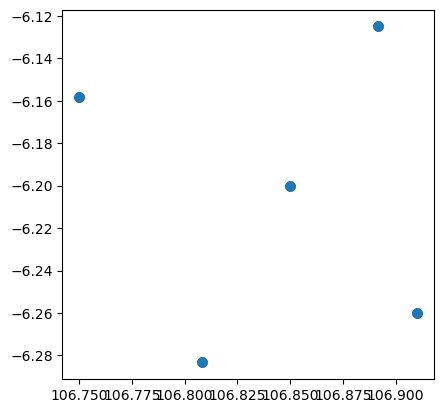

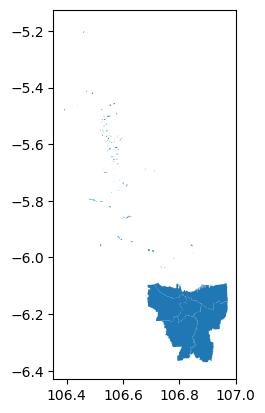

In [15]:
gdf_ispa.plot()
gdf_shapefile.plot()

In [16]:
#join all the variables
result = gdf_ispa.merge(gdf_shapefile, on = 'KABKOT')
result['geometry'] = result['geometry_y']
result = gpd.GeoDataFrame(result)
result_pop = result[['longitude', 'latitude', 'ispa', 'month', 'year', 'KABKOT', 'geometry', 'time']]

<Axes: >

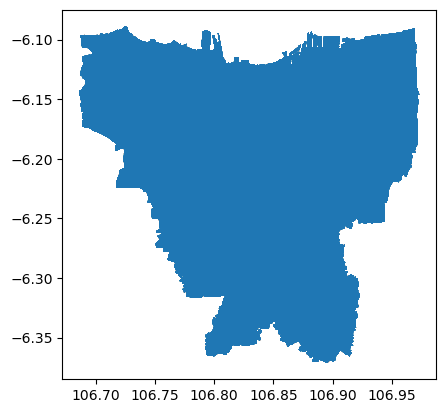

In [17]:
result_pop.plot()

In [18]:
result_pop.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   longitude  300 non-null    float64 
 1   latitude   300 non-null    float64 
 2   ispa       300 non-null    int64   
 3   month      300 non-null    int64   
 4   year       300 non-null    int64   
 5   KABKOT     300 non-null    object  
 6   geometry   300 non-null    geometry
 7   time       300 non-null    object  
dtypes: float64(2), geometry(1), int64(3), object(2)
memory usage: 18.9+ KB


In [19]:
# Identify rows in gdf_excel that don't have a match in the result
non_matching_rows = gdf_ispa[~gdf_ispa.index.isin(result.index)]
print(non_matching_rows)

Empty GeoDataFrame
Columns: [Unnamed: 0.2, Unnamed: 0.1, Unnamed: 0, KABKOT, month, year, longitude, latitude, RH, time, t2m, tp, ispa, geometry]
Index: []


**SHOW THE COLUMNS**

In [20]:
# Dissolve berdasarkan 'KABKOT' dan 'month' dengan fungsi agregasi mean
dissolved_result = result_pop.dissolve(by=['KABKOT', 'month', 'year'])

# Reset indeks untuk membuat kolom 'KABKOT' 'month', dan 'year' menjadi kolom
dissolved_result.reset_index(inplace=True)

dissolved_result.head()

,KABKOT,month,year,geometry,longitude,latitude,ispa,time
0,JAKARTA BARAT,1,2018,"POLYGON Z ((106.71133 -6.09591 0.00000, 106.71...",106.75,-6.158333,35036,2018-01-01
1,JAKARTA BARAT,1,2019,"POLYGON Z ((106.71133 -6.09591 0.00000, 106.71...",106.75,-6.158333,1688,2019-01-01
2,JAKARTA BARAT,1,2020,"POLYGON Z ((106.71133 -6.09591 0.00000, 106.71...",106.75,-6.158333,30245,2020-01-01
3,JAKARTA BARAT,1,2021,"POLYGON Z ((106.71133 -6.09591 0.00000, 106.71...",106.75,-6.158333,8616,2021-01-01
4,JAKARTA BARAT,1,2022,"POLYGON Z ((106.71133 -6.09591 0.00000, 106.71...",106.75,-6.158333,19330,2022-01-01


In [21]:
dissolved_result

,KABKOT,month,year,geometry,longitude,latitude,ispa,time
0,JAKARTA BARAT,1,2018,"POLYGON Z ((106.71133 -6.09591 0.00000, 106.71...",106.750000,-6.158333,35036,2018-01-01
1,JAKARTA BARAT,1,2019,"POLYGON Z ((106.71133 -6.09591 0.00000, 106.71...",106.750000,-6.158333,1688,2019-01-01
2,JAKARTA BARAT,1,2020,"POLYGON Z ((106.71133 -6.09591 0.00000, 106.71...",106.750000,-6.158333,30245,2020-01-01
3,JAKARTA BARAT,1,2021,"POLYGON Z ((106.71133 -6.09591 0.00000, 106.71...",106.750000,-6.158333,8616,2021-01-01
4,JAKARTA BARAT,1,2022,"POLYGON Z ((106.71133 -6.09591 0.00000, 106.71...",106.750000,-6.158333,19330,2022-01-01
...,...,...,...,...,...,...,...,...
295,JAKARTA UTARA,12,2018,"POLYGON Z ((106.72568 -6.08938 0.00000, 106.72...",106.891667,-6.125000,9376,2018-12-01
296,JAKARTA UTARA,12,2019,"POLYGON Z ((106.72568 -6.08938 0.00000, 106.72...",106.891667,-6.125000,31251,2019-12-01
297,JAKARTA UTARA,12,2020,"POLYGON Z ((106.72568 -6.08938 0.00000, 106.72...",106.891667,-6.125000,6555,2020-12-01
298,JAKARTA UTARA,12,2021,"POLYGON Z ((106.72568 -6.08938 0.00000, 106.72...",106.891667,-6.125000,11270,2021-12-01


**SET FOR MAPPING**

In [22]:
# ubah per month
import pandas as pd

In [23]:
dissolved_result_df = pd.DataFrame(dissolved_result.drop(['geometry'],axis = 1))
#dissolved_result_df = dissolved_result_df.drop(['geometry'], axis=1) #kolom geometry di hapus

In [24]:
#untuk mengurutkan file berdasarkan
dissolved_result_df = dissolved_result_df.sort_values(by=[ 'year', 'KABKOT', 'month'])

In [25]:
polygon_result = gpd.sjoin(gdf_shapefile, dissolved_result, how='inner', predicate='intersects')

In [26]:
print(polygon_result.columns)

Index(['PROVNO', 'KABKOTNO', 'PROVINSI', 'KABKOT_left', 'geometry',
       'index_right', 'KABKOT_right', 'month', 'year', 'longitude', 'latitude',
       'ispa', 'time'],
      dtype='object')


**MAPPING**

In [27]:
import calendar
import matplotlib.pyplot as plt
import math

Peta Kejadian ISPA Tahun 2018-2022

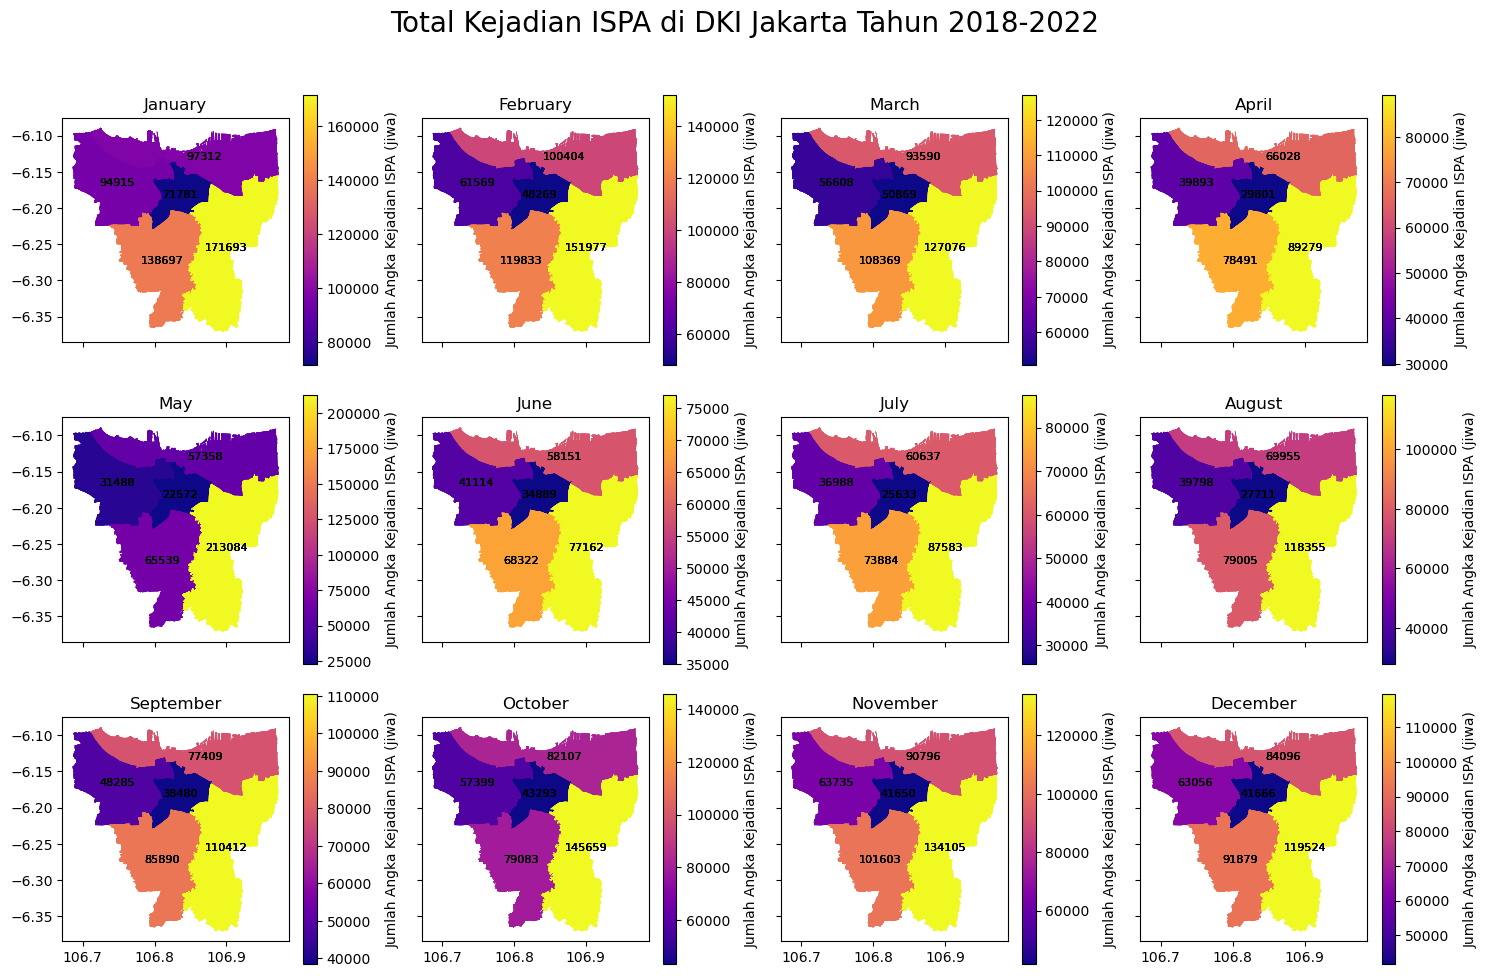

In [38]:
# Filter data for the years 2018 to 2022
data_2018_2022 = dissolved_result[(dissolved_result['year'] >= 2018) & (dissolved_result['year'] <= 2022)]

# Create a figure with subplots for each month
fig, axs = plt.subplots(3, 4, figsize=(15, 10), sharex=True, sharey=True)
fig.suptitle('Total Kejadian ISPA di DKI Jakarta Tahun 2018-2022', fontsize=20)

# Iterate through each month and plot the data for the years 2018 to 2022
for month, ax in zip(range(1, 13), axs.flatten()):
    # Filter data for the current month and years 2020 to 2022
    data_monthly = data_2018_2022[data_2018_2022['month'] == month]

    # Calculate the total ISPA cases for each Kabupaten/Kota for the current month
    total_ispa_per_kabkot = data_monthly.groupby(['KABKOT'])['ispa'].sum().reset_index()

    # Merge the total ISPA cases back to the GeoDataFrame for the current month
    data_monthly_total_ispa = data_monthly.merge(total_ispa_per_kabkot, on='KABKOT', how='left', suffixes=('_original', '_total'))

    # Plot the map for the current month
    data_monthly_total_ispa.plot(ax=ax, column="ispa_total", legend=True, legend_kwds={"label": "Jumlah Angka Kejadian ISPA (jiwa)"})

    # Annotate each polygon with total ISPA cases value
    for idx, row in data_monthly_total_ispa.iterrows():
        ax.text(row.geometry.centroid.x, row.geometry.centroid.y, f"{row['ispa_total']:.0f}", fontsize=8, ha='center', va='center')

    ax.set_title(calendar.month_name[month])  # Using calendar module to get the month name

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

cmap = plt.get_cmap('plasma')
plt.set_cmap(cmap)

# Show the plot
plt.show()

Peta Kejadian ISPA Tahun 2018

In [29]:
# Pakai filter tahun jika ingin melihat sebaran kasus per tahun

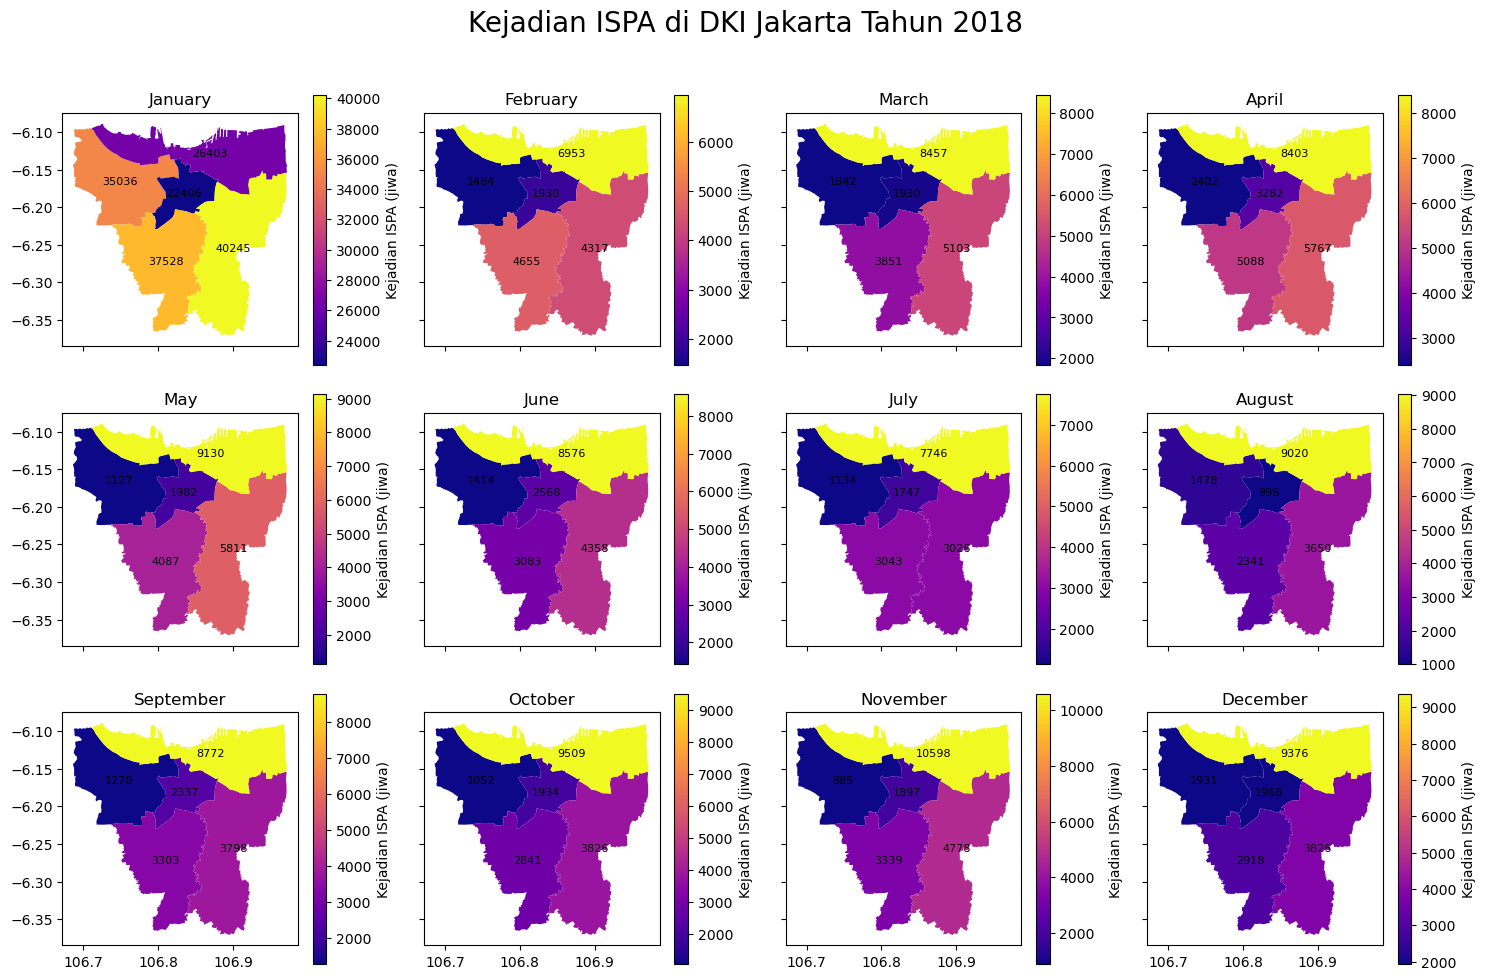

In [31]:
# Filter data for the year 2022
data_2022 = dissolved_result[dissolved_result['year'] == 2018]

# Create a figure with subplots for each month
fig, axs = plt.subplots(3, 4, figsize=(15, 10), sharex=True, sharey=True)
fig.suptitle('Kejadian ISPA di DKI Jakarta Tahun 2018', fontsize=20)

# Iterate through each month and plot the data for the year 2022
for month, ax in zip(range(1, 13), axs.flatten()):
    # Filter data for the current month and year
    data_monthly = data_2022[data_2022['month'] == month]

    # Plot the map for the current month
    data_monthly.plot(ax=ax, column="ispa", legend=True, legend_kwds={"label": "Kejadian ISPA (jiwa)"})

    # Annotate each polygon with average ISPA value
    for idx, row in data_monthly.iterrows():
        ax.text(row.geometry.centroid.x, row.geometry.centroid.y, f"{row['ispa']}", fontsize=8, ha='center', va='center')

    ax.set_title(calendar.month_name[month])  # Using calendar module to get the month name

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

cmap = plt.get_cmap('plasma')
plt.set_cmap(cmap)

# Show the plot
plt.show()

**GRAPHS**

In [32]:
import calendar
import matplotlib.pyplot as plt

In [33]:
# Format for monthly graph
dissolved_result_df['month_name'] = pd.to_datetime(dissolved_result_df['month'], format='%m').dt.month_name()

# Set the ['month_name'] as an index
dissolved_result_df= dissolved_result_df.set_index('month_name')

In [34]:
dissolved_result

,KABKOT,month,year,geometry,longitude,latitude,ispa,time
0,JAKARTA BARAT,1,2018,"POLYGON Z ((106.71133 -6.09591 0.00000, 106.71...",106.750000,-6.158333,35036,2018-01-01
1,JAKARTA BARAT,1,2019,"POLYGON Z ((106.71133 -6.09591 0.00000, 106.71...",106.750000,-6.158333,1688,2019-01-01
2,JAKARTA BARAT,1,2020,"POLYGON Z ((106.71133 -6.09591 0.00000, 106.71...",106.750000,-6.158333,30245,2020-01-01
3,JAKARTA BARAT,1,2021,"POLYGON Z ((106.71133 -6.09591 0.00000, 106.71...",106.750000,-6.158333,8616,2021-01-01
4,JAKARTA BARAT,1,2022,"POLYGON Z ((106.71133 -6.09591 0.00000, 106.71...",106.750000,-6.158333,19330,2022-01-01
...,...,...,...,...,...,...,...,...
295,JAKARTA UTARA,12,2018,"POLYGON Z ((106.72568 -6.08938 0.00000, 106.72...",106.891667,-6.125000,9376,2018-12-01
296,JAKARTA UTARA,12,2019,"POLYGON Z ((106.72568 -6.08938 0.00000, 106.72...",106.891667,-6.125000,31251,2019-12-01
297,JAKARTA UTARA,12,2020,"POLYGON Z ((106.72568 -6.08938 0.00000, 106.72...",106.891667,-6.125000,6555,2020-12-01
298,JAKARTA UTARA,12,2021,"POLYGON Z ((106.72568 -6.08938 0.00000, 106.72...",106.891667,-6.125000,11270,2021-12-01


Grafik Tren ISPA Tahun 2018-2022

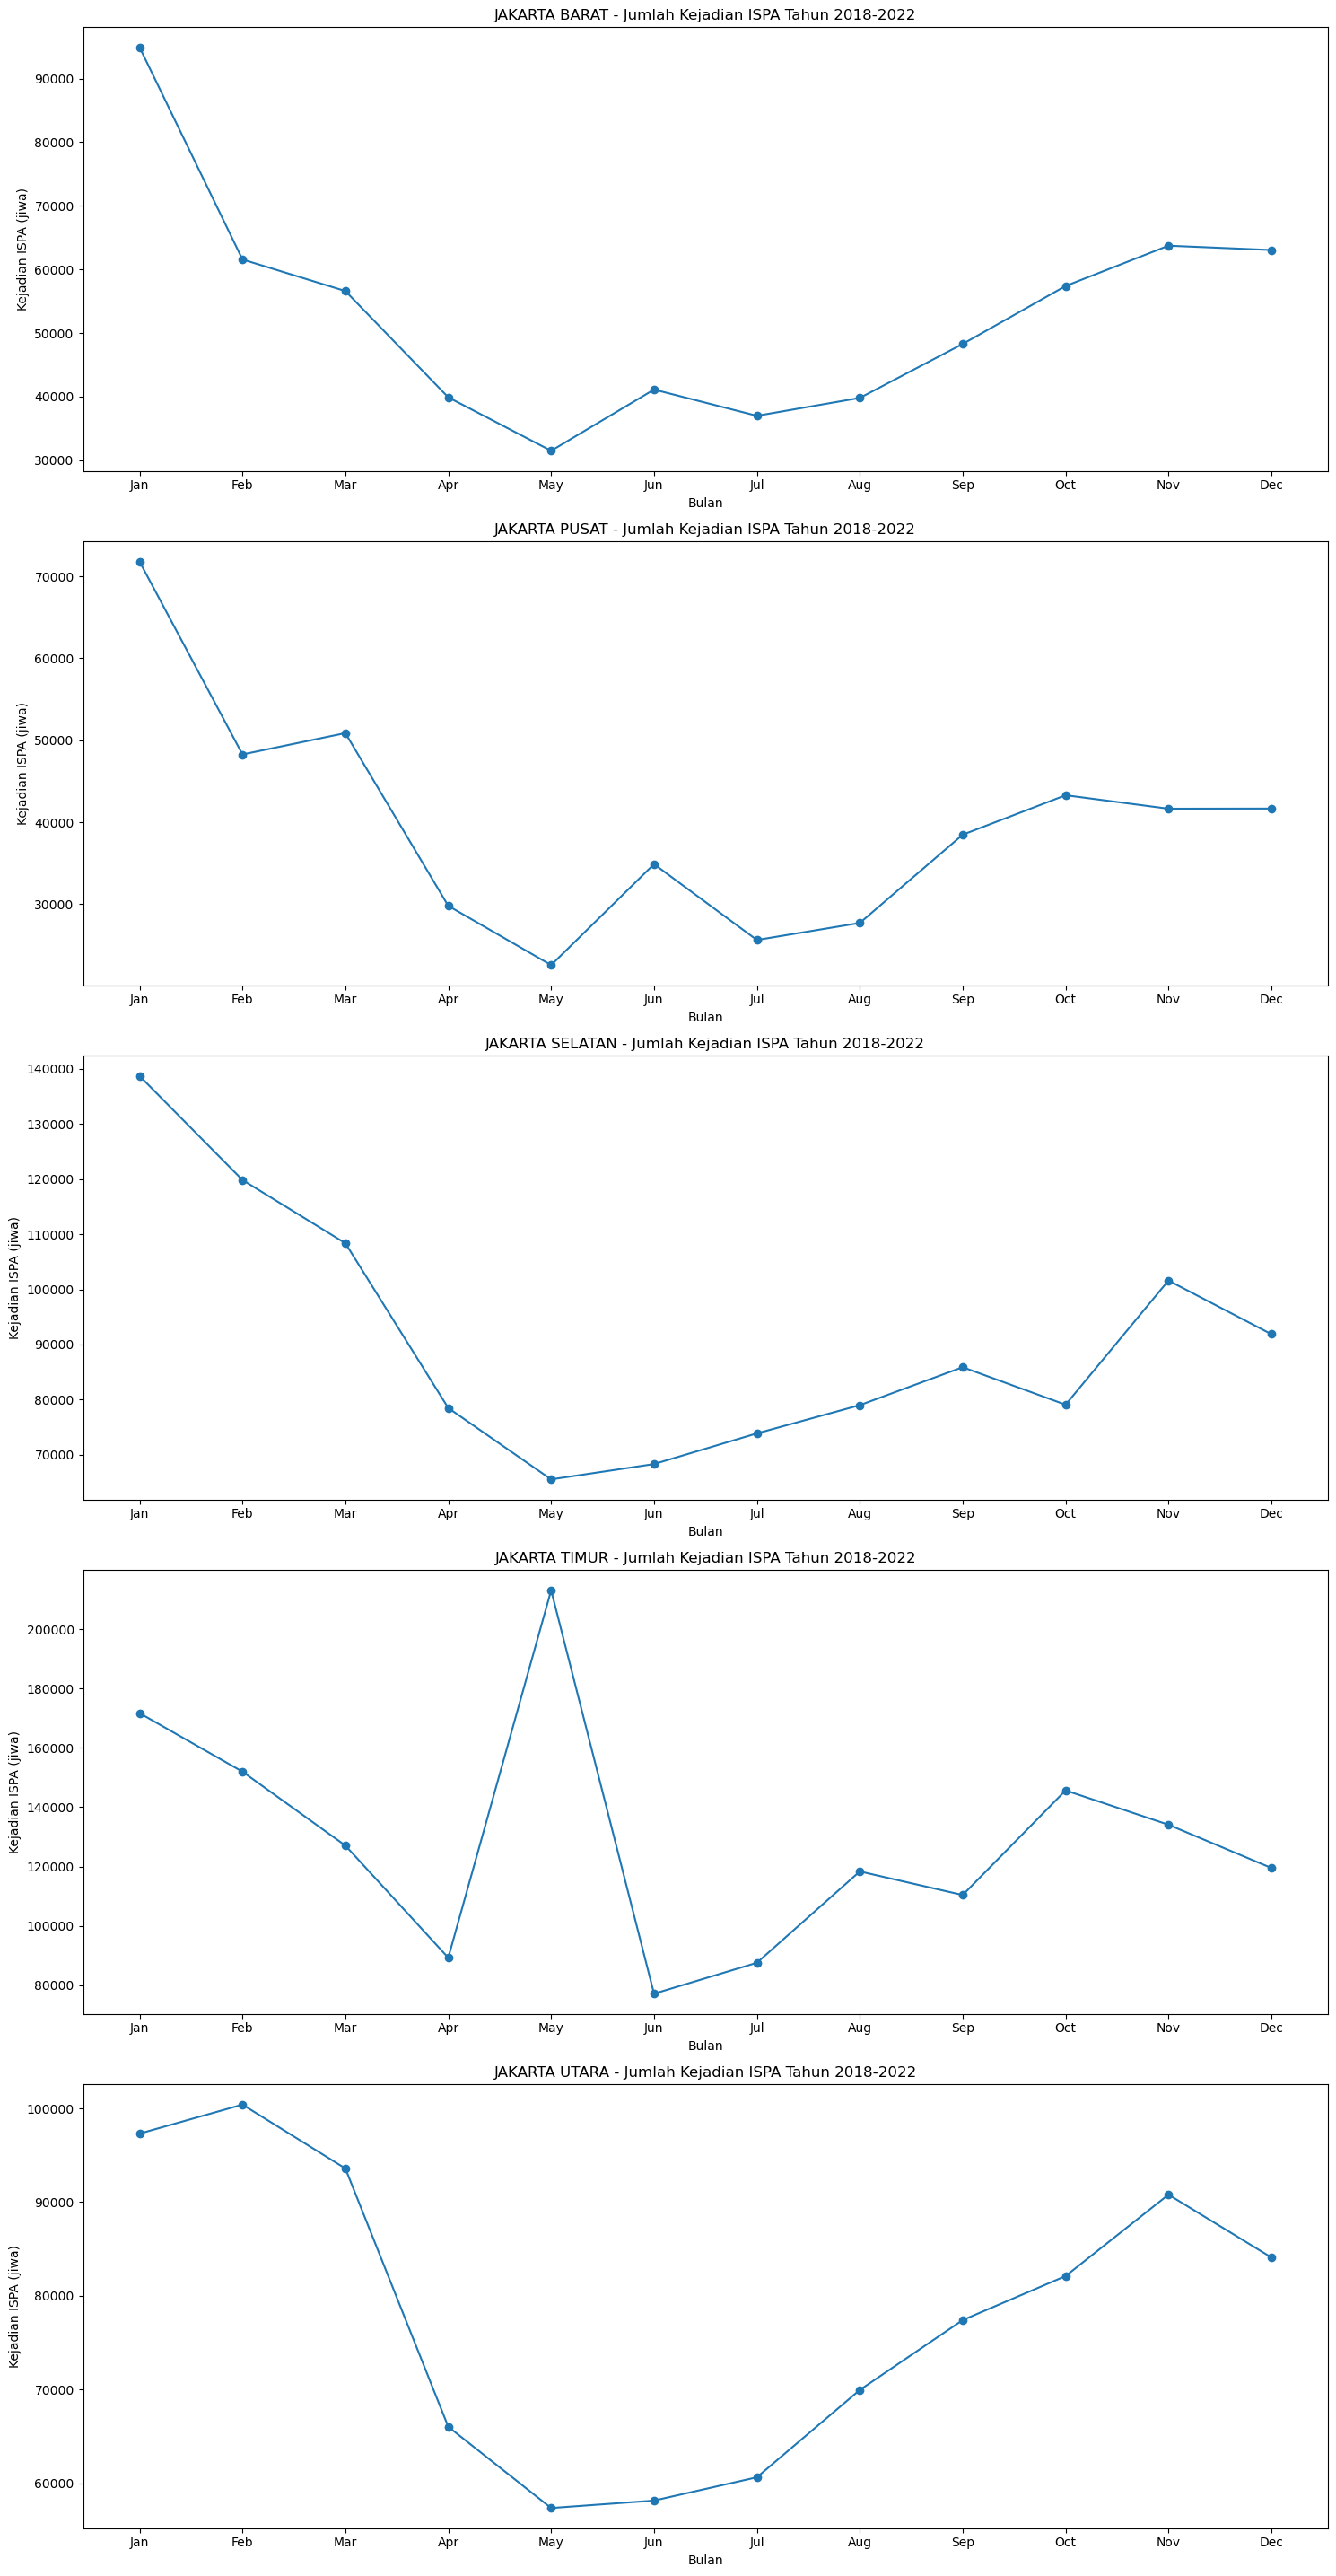

In [35]:
fig = plt.figure(figsize=(15, 30))
cities = list(dissolved_result_df['KABKOT'].unique())
data_2022 = dissolved_result_df[(dissolved_result_df['year'] >= 2018) & (dissolved_result_df['year'] <= 2022)]

# Iterate through each city and plot the average values for the year 2022
for idx, city in enumerate(cities, start=1):
    # Filter data for the current city and year
    data_city = data_2022[(data_2022['KABKOT'] == city)]

    # Calculate the monthly averages
    monthly_sum = data_city.groupby('month')['ispa'].sum()

    # Plot the map for the current city
    plt.subplot(len(cities), 1, idx)
    plt.plot(monthly_sum, marker='o')
    plt.title(f'{city} - Jumlah Kejadian ISPA Tahun 2018-2022')
    plt.xlabel('Bulan')
    plt.ylabel('Kejadian ISPA (jiwa)')
    plt.xticks(range(1, 13), [calendar.month_abbr[i] for i in range(1, 13)])  # Display month names

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()

Grafik Tren ISPA Tahun 2022

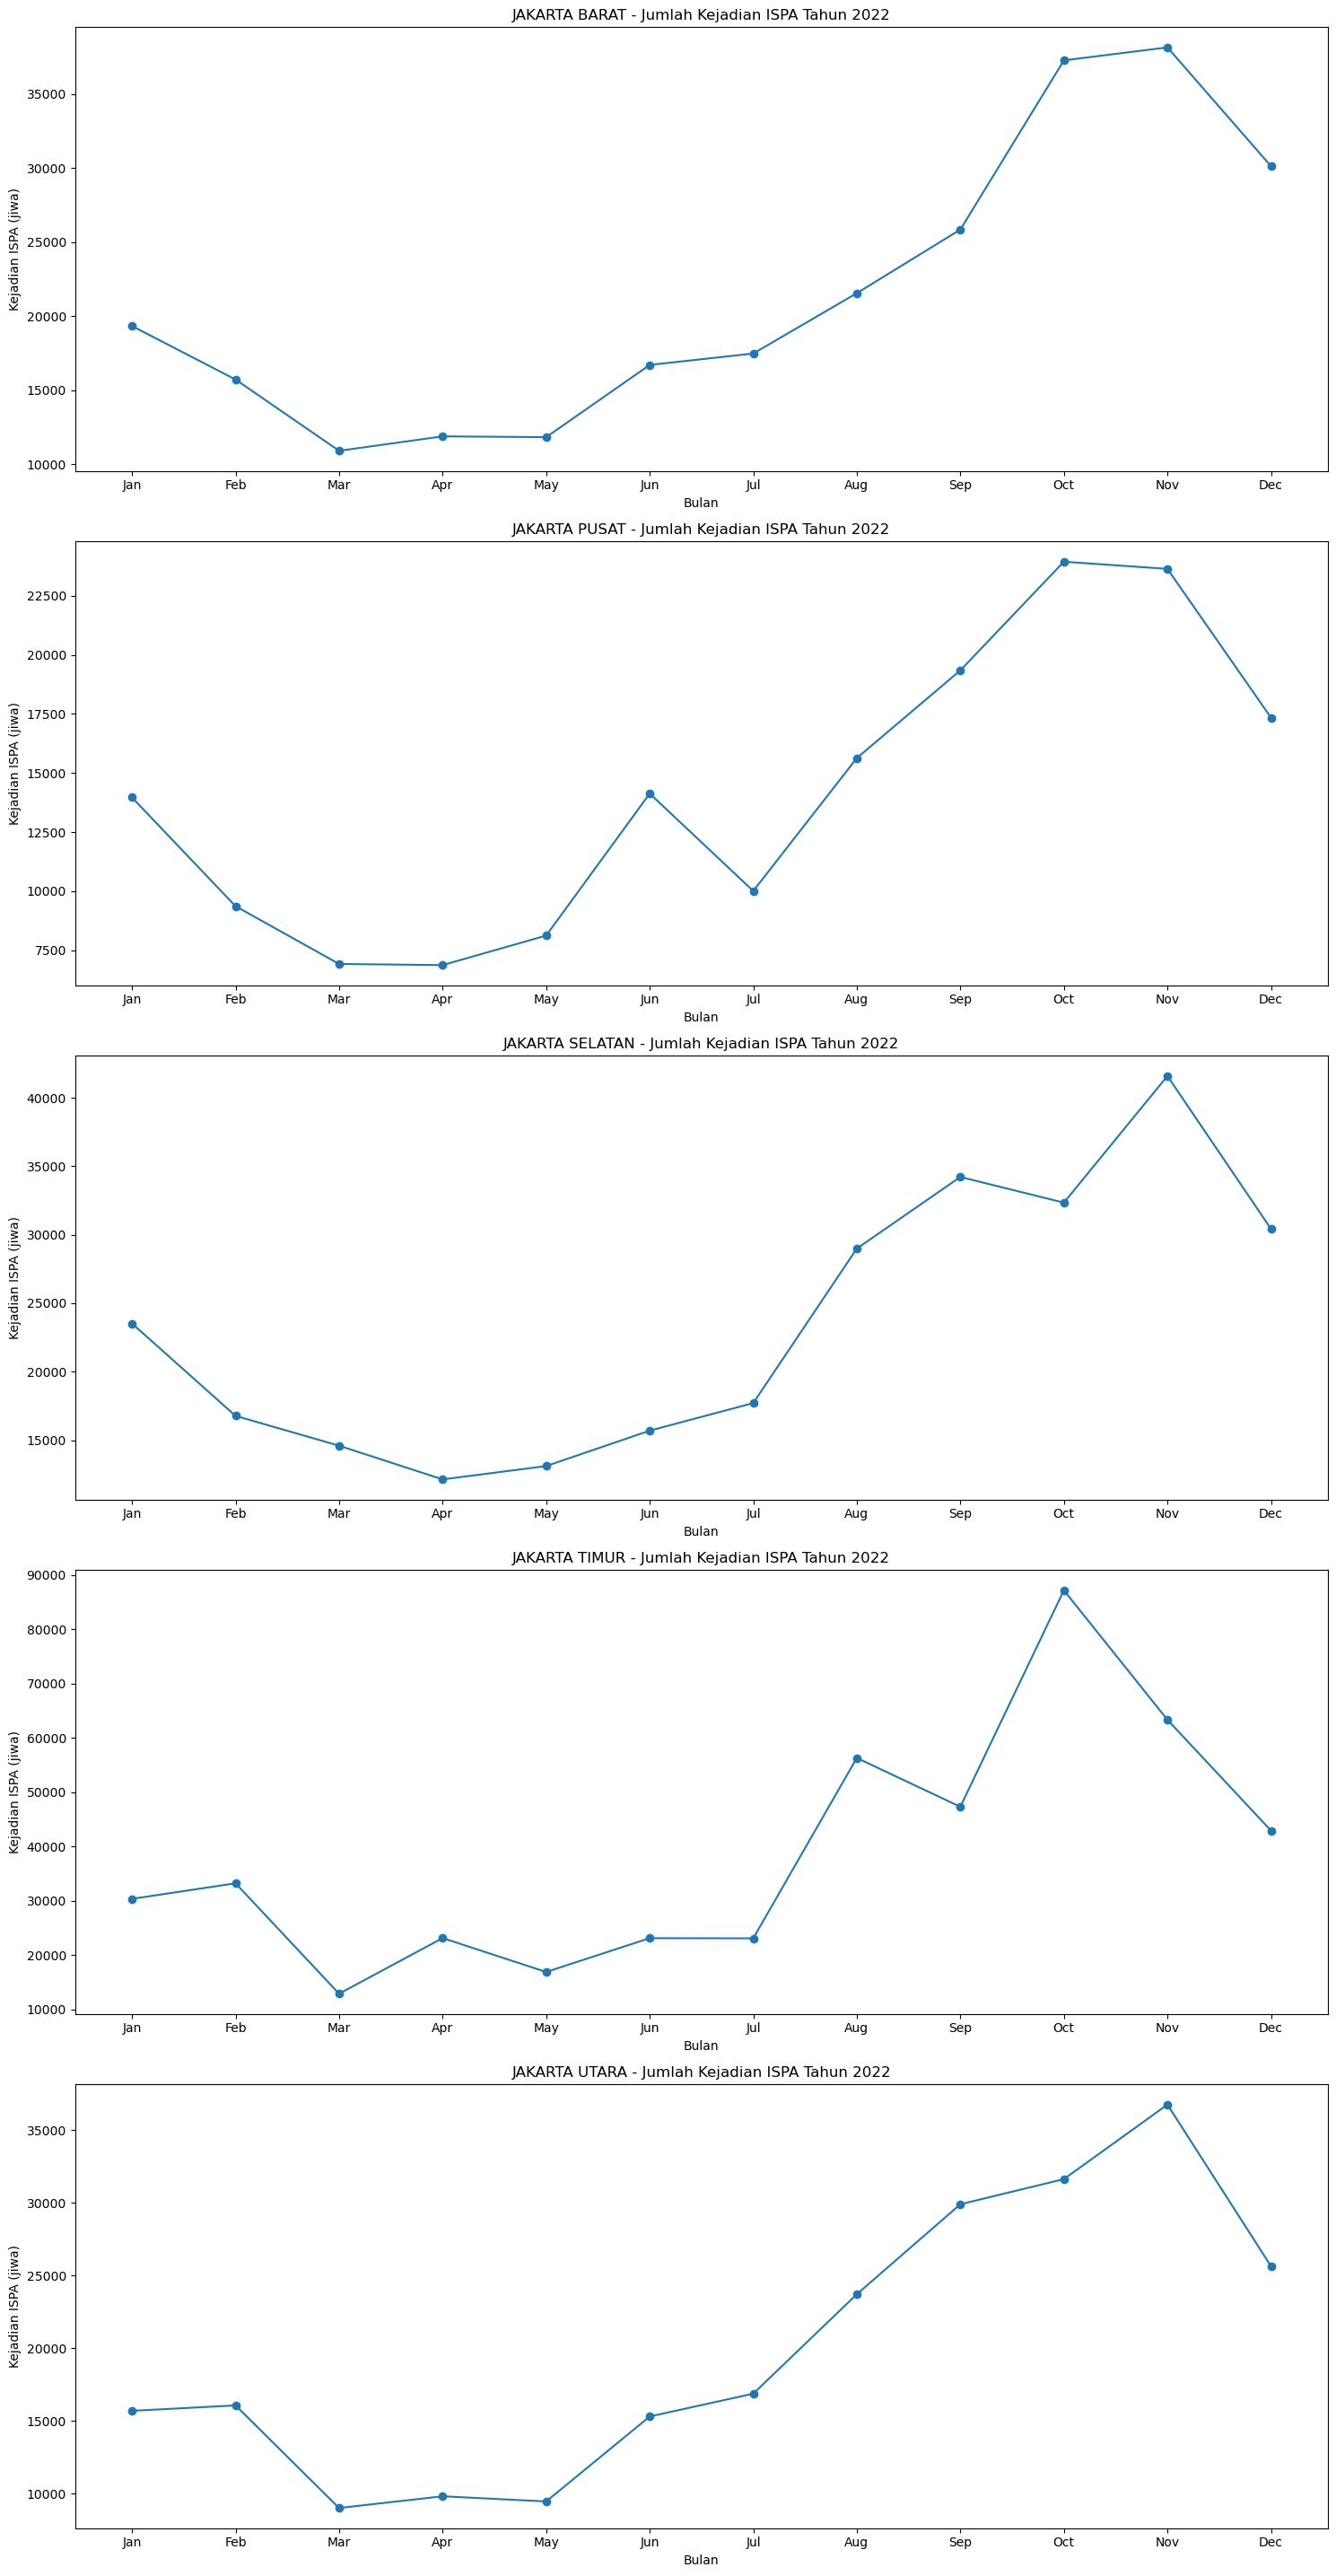

In [37]:
fig = plt.figure(figsize=(15, 30))
cities = list(dissolved_result_df['KABKOT'].unique())

# Iterate through each city and plot the average values for the year 2022
for idx, city in enumerate(cities, start=1):
    # Filter data for the current city and year
    data_city_2022 = dissolved_result_df[(dissolved_result_df['KABKOT'] == city) & (dissolved_result_df['year'] == 2022)]

    # Calculate the monthly averages
    monthly_avg = data_city_2022.groupby('month')['ispa'].mean()

    # Plot the map for the current city
    plt.subplot(len(cities), 1, idx)
    plt.plot(monthly_avg, marker='o')
    plt.title(f'{city} - Jumlah Kejadian ISPA Tahun 2022')
    plt.xlabel('Bulan')
    plt.ylabel('Kejadian ISPA (jiwa)')
    plt.xticks(range(1, 13), [calendar.month_abbr[i] for i in range(1, 13)])  # Display month names

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()